In [48]:
import pandas as pd
import csv
import pickle
import numpy as np
from sklearn.neighbors import NearestNeighbors
import numpy as np


In [1]:
# Load data

In [49]:
red_data = pd.read_csv(r'C:\Users\DELL\Desktop\reducedDataset.csv')

In [50]:
red_data

,disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,yellowing_of_eyes,malaise,chest_pain
0,hepatitis A,1,0,0,0,0,0,1,0,1,...,0,1,1,1,1,1,1,1,0,0
1,Gastroenteritis,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Typhoid,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,1,1,0,0,0
3,Hepatitis B,1,0,0,0,0,1,0,0,0,...,0,1,1,0,1,1,0,1,1,0
4,Bronchial Asthma,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,Hepatitis E,0,0,0,0,1,0,1,0,1,...,0,1,1,1,1,1,0,1,0,0
4916,Jaundice,1,0,0,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
4917,Hypertension,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4918,Common Cold,0,1,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1


In [51]:
pickle.dump(red_data, open("save.p", "wb"))

In [52]:
load_red = pickle.load( open( "save.p", "rb" ) )

In [53]:
load_red

,disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,yellowing_of_eyes,malaise,chest_pain
0,hepatitis A,1,0,0,0,0,0,1,0,1,...,0,1,1,1,1,1,1,1,0,0
1,Gastroenteritis,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Typhoid,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,1,1,0,0,0
3,Hepatitis B,1,0,0,0,0,1,0,0,0,...,0,1,1,0,1,1,0,1,1,0
4,Bronchial Asthma,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,Hepatitis E,0,0,0,0,1,0,1,0,1,...,0,1,1,1,1,1,0,1,0,0
4916,Jaundice,1,0,0,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
4917,Hypertension,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4918,Common Cold,0,1,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1


In [57]:

Y=red_data['disease']
X=red_data.loc[:, red_data.columns != 'disease']

In [66]:
Y

0            hepatitis A
1        Gastroenteritis
2                Typhoid
3            Hepatitis B
4       Bronchial Asthma
              ...       
4915         Hepatitis E
4916            Jaundice
4917       Hypertension 
4918         Common Cold
4919       Hypertension 
Name: disease, Length: 4920, dtype: object

In [82]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,yellowing_of_eyes,malaise,chest_pain
0,1,0,0,0,0,0,1,0,1,0,...,0,1,1,1,1,1,1,1,0,0
1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,1,0,1,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,1,0,1,0,1,0,...,0,1,1,1,1,1,0,1,0,0
4916,1,0,0,0,0,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0,0
4917,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4918,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [ ]:
## Train decision tree

In [83]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
## Generate Graphical Representation of the Tree 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.2357 to fit



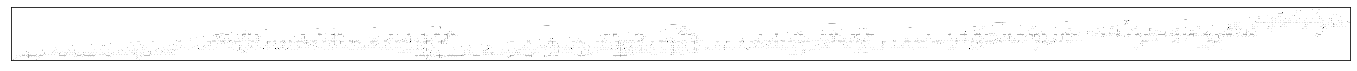

In [84]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus # generates graphs. >>pip install pydotplus + install GraphViz + conda install graphviz
# install graphviz  from: https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi 
# Add c:\Program Files (x86)\Graphviz2.38\bin\ to system path

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png('red.png');
fig, ax = plt.subplots(figsize=(24, 24))
ax.imshow(plt.imread('red.png'));
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Test the model

In [85]:
sample_index = 16
sample_attributes = X_train.iloc[sample_index, :]
print('Prediction for sample #{0:d} ({1})'.format(sample_index+1,sample_attributes))
print(f'\tPredicted: {clf.predict([sample_attributes])}. Expected: {y_test.iloc[sample_index]}')
print('\tPredicted probabilities:{0}'.format(clf.predict_proba([sample_attributes])))
print('\nOverall prediction score:{0:f}'.format(clf.score(X=X_test,y=y_test)))

Prediction for sample #17 (itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     1
shivering               0
chills                  0
joint_pain              0
stomach_pain            0
acidity                 0
ulcers_on_tongue        0
muscle_wasting          1
vomiting                1
burning_micturition     0
spotting_urination      0
fatigue                 1
weight_gain             0
anxiety                 0
cough                   1
high_fever              1
sweating                0
headache                0
yellowish_skin          0
dark_urine              0
nausea                  0
loss_of_appetite        0
abdominal_pain          0
diarrhoea               0
yellowing_of_eyes       0
malaise                 0
chest_pain              0
Name: 3807, dtype: int64)
	Predicted: ['Bronchial Asthma']. Expected: Hypoglycemia
	Predicted probabilities:[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 

In [ ]:
### Manually Compute Accuracy

In [86]:
y_predict =clf.predict(X_test) 
fraction_of_correct_preditions = sum(y_test==y_predict)/len(y_test)
print('fraction of correct predictions: {0:6.6f}'.format(fraction_of_correct_preditions))

fraction of correct predictions: 0.957512


In [87]:
y_predict =clf.predict(X_test) 
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_predict)
print('Accuracy Score: {0:f}'.format(acc_score))

Accuracy Score: 0.957512


In [ ]:
# Explore missclassification using confusion matrix

In [88]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix

array([[48,  0,  0, ...,  0,  0,  0],
       [ 0, 40,  0, ...,  0,  0,  0],
       [ 0,  0, 37, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ..., 25,  0,  0],
       [ 0,  0,  2, ...,  1, 30,  0],
       [ 0,  0,  0, ...,  0,  0, 30]], dtype=int64)